<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter6_Convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Conv Nets

## Sequence processing with convnets

The previous notebook was getting unwieldy - here we look at 1D convnets for sequence processing. These are competitive with RNNs, and tend to be much quicker

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import pandas as pd

Using TensorFlow backend.


In [0]:
max_features=10000
max_length = 500

# Overwrite np.load to allow keras to work with the new Numpy defaults
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
np.load = old
del(old)


# Turns the list of integers into a 2D integer tensor
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length)

model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_features, 128, input_length=max_length))
model.add(keras.layers.Conv1D(32, 7, activation="relu"))  # In 1D, we can afford to use larger convs
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(32, 7, activation="relu"))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(1))

print(model.summary())

model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4), 
              loss="binary_crossentropy",
              metrics=["acc"]
             )

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2
                   )

W0620 18:01:32.997576 139915974834048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 18:01:33.008469 139915974834048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 18:01:33.091301 139915974834048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0620 18:01:33.158667 139915974834048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 18:01:33.167992 139915974834048 deprecation_wrapper.py:119] From /us

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


W0620 18:01:33.616676 139915974834048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.8337 - acc: 0.5090 - val_loss: 0.6874 - val_acc: 0.5654
Epoch 2/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.6700 - acc: 0.6390 - val_loss: 0.6642 - val_acc: 0.6574
Epoch 3/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.6237 - acc: 0.7523 - val_loss: 0.6080 - val_acc: 0.7442
Epoch 4/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.5258 - acc: 0.8078 - val_loss: 0.4846 - val_acc: 0.8068
Epoch 5/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.4095 - acc: 0.8481 - val_loss: 0.4202 - val_acc: 0.8324
Epoch 6/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.3491 - acc: 0.8678 - val_loss: 0.4142 - val_acc: 0.8370
Epoch 7/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.3095 - acc: 0.8678 - val_loss: 0.4362 - val_acc:

In [0]:
def plotLossAndAccuracy(history):
  history_dict = history.history
  acc = history_dict["acc"]
  val_acc = history_dict["val_acc"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, acc, "bo", label="Training Accuracy")
  plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs, loss, "bo", label="Training Loss")
  plt.plot(epochs, val_loss, "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

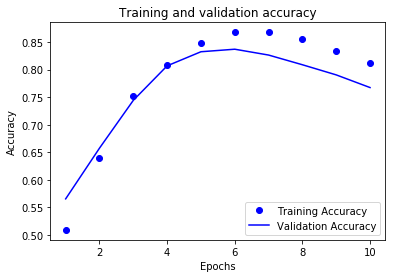

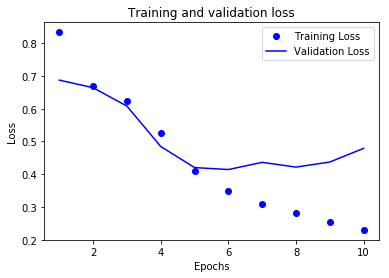

In [0]:
plotLossAndAccuracy(history)

So the 1D convnet does about as well as the LSTM, but is quite a bit quicker. Note however that beyond the convolution window, a 1D convnet isn't sensitive to the order of the timestamps. We can see this if we try to run  a 1D convnet on the temperature-forecasting problem:

In [3]:
# First, download the raw  data  (14 different atmospheric quantities + temperature over 7 years).
!wget --no-check-certificate \
    https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip \
    -O /tmp/climatedata.zip
zip_ref = zipfile.ZipFile("/tmp/climatedata.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

fname = "/tmp/jena_climate_2009_2016.csv"
df = pd.read_csv(fname, index_col=0, parse_dates=False)
float_data = df.to_numpy()

# Normalize
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std


# Generator yielding timeseries samples and their targets

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
  """
  Parameters
  ----------
  data : 2d numpy array
      The array of floating-point timeseries data, normalized.
  lookback : int
      How many timesteps back the input data should go.
  delay: int
      How many timesteps in the future the target should be.
  min_index: int
      The lower bound of timesteps to draw from (helps keep validation/test data separate) 
  max_index: int
      The upper bound of timesteps to draw from (helps keep validation/test data separate)
  shuffle: bool
      Whether to shuffle the samples or draw them in chronological order
  batch_size: int
      The number of samples per batch.
  step: int
      The period, in timesteps, at which you sample data.
  """
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while True:
    if shuffle:
      rows = np.random.randint(min_index+lookback, max_index, size=batch_size)
    else:
      if i+batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i+batch_size, max_index))
      i += len(rows)
      
    samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]  # temperature is the second column
    yield samples, targets
    
    
# Create a training, validation, and test generator looking at different segments of the data
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size
                     )
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size
                   )
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size
                    )

# How many steps to draw from val_gen in order to see the entire validation set
val_steps = (300000 - 200001 - lookback) // batch_size
# As above, for the test set
test_steps = (len(float_data) - 300001 - lookback) // batch_size



--2019-06-21 11:38:51--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.131.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.131.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘/tmp/climatedata.zip’

/tmp/climatedata.zi 100%[===================>]  12.94M  75.5MB/s    in 0.2s    

2019-06-21 11:38:52 (75.5 MB/s) - ‘/tmp/climatedata.zip’ saved [13568290/13568290]



In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(32, 5, activation="relu", input_shape=(None, float_data.shape[-1])))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Conv1D(32, 5, activation="relu"))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Conv1D(32, 5, activation="relu"))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(1))



model.compile(optimizer=keras.optimizers.RMSprop(), 
              loss="mae"
             )

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps
                             )

Epoch 1/20
500/500 [==============================] - 46s 92ms/step - loss: 0.4189 - val_loss: 0.4273
Epoch 2/20
500/500 [==============================] - 46s 91ms/step - loss: 0.3636 - val_loss: 0.4422
Epoch 3/20
500/500 [==============================] - 46s 91ms/step - loss: 0.3405 - val_loss: 0.4444
Epoch 4/20
500/500 [==============================] - 45s 91ms/step - loss: 0.3279 - val_loss: 0.4663
Epoch 5/20
500/500 [==============================] - 45s 91ms/step - loss: 0.3162 - val_loss: 0.4552
Epoch 6/20
500/500 [==============================] - 45s 91ms/step - loss: 0.3087 - val_loss: 0.4603
Epoch 7/20
500/500 [==============================] - 46s 92ms/step - loss: 0.3023 - val_loss: 0.4505
Epoch 8/20
500/500 [==============================] - 46s 92ms/step - loss: 0.2982 - val_loss: 0.5195
Epoch 9/20
500/500 [==============================] - 46s 92ms/step - loss: 0.2928 - val_loss: 0.4947
Epoch 10/20
500/500 [==============================] - 46s 93ms/step - loss: 0.288

In [0]:
def plotLoss(history):
  history_dict = history.history
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, loss, "bo", label="Training Loss")
  plt.plot(epochs, val_loss, "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

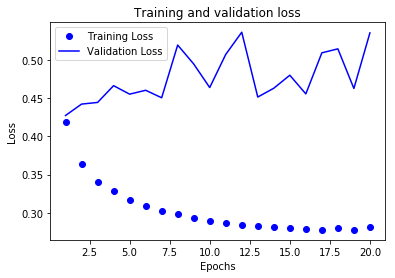

In [0]:
plotLoss(history)


The 1D convnet is rubbish on the temperature-prediction task, you can't beat the common-sense baseline (or even come close).

### Combining CNNs and RNNs to process long sequences

We can try to combine the speed of a convnet with the order-sensitivity of an RNN  by using a 1D convnet as a preprocessing step, which downsamples the sequence.

In [0]:
lookback = 720
step = 3
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size
                     )
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size
                   )

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size
                    )

# How many steps to draw from val_gen in order to see the entire validation set
val_steps = (300000 - 200001 - lookback) // batch_size
# As above, for the test set
test_steps = (len(float_data) - 300001 - lookback) // batch_size



In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(32, 5, activation="relu", input_shape=(None, float_data.shape[-1])))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Conv1D(32, 5, activation="relu"))
model.add(keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(keras.layers.Dense(1))



model.compile(optimizer=keras.optimizers.RMSprop(), 
              loss="mae"
             )

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps
                             )

W0621 11:39:52.891015 140636686014336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 11:39:52.950800 140636686014336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 11:39:52.962800 140636686014336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 11:39:53.022826 140636686014336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0621 11:39:53.138454 140636686014336 deprecation_wrapp

Epoch 1/20
500/500 [==============================] - 79s 159ms/step - loss: 0.3403 - val_loss: 0.2900
Epoch 2/20
500/500 [==============================] - 77s 155ms/step - loss: 0.3057 - val_loss: 0.3165
Epoch 3/20
500/500 [==============================] - 78s 155ms/step - loss: 0.2936 - val_loss: 0.2751
Epoch 4/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2837 - val_loss: 0.2885
Epoch 5/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2781 - val_loss: 0.2791
Epoch 6/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2714 - val_loss: 0.2799
Epoch 7/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2663 - val_loss: 0.2898
Epoch 8/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2604 - val_loss: 0.2803
Epoch 9/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2580 - val_loss: 0.2831
Epoch 10/20
500/500 [==============================] - 78s 156ms/step - l

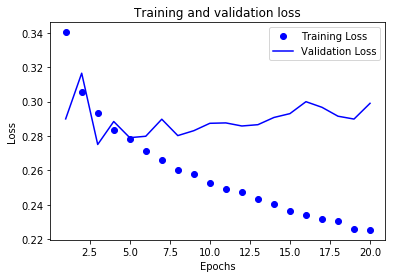

In [8]:
plotLoss(history)

This setup is about as good as the regularised `GRU` by itself, but is much quicker.